# 지도시각화
## John Snow cholera map
* 1854년 런던의 콜레라 전염병 지도 시각화 사례
* 상수도 펌프와 콜레라 확산 간의 관련성을 밝혀냄

![dissove](./data/1286px-Snow-cholera-map-1.jpg)

## Facebook 사용자 연결지도
* Made by Paul Butler

![facebook-world-map.jpg](./data/facebook-world-map.jpg)

## GeoPandas를 이용해 데이터 시각화 하기

In [1]:
# 라이브러리 추가하기
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

%matplotlib inline

In [3]:
# _01 서울시 시군구 지도 데이터 불러오기
_seoul_sgg = './output/final/seoul_sgg_stat.geojson'
seoul_sgg_stat = gpd.read_file(_seoul_sgg)
print(seoul_sgg_stat.crs, '\n')
seoul_sgg_stat.info()
seoul_sgg_stat.head()

epsg:4326 

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   index       25 non-null     int64   
 1   SGG_NM      25 non-null     object  
 2   SGG_CODE    25 non-null     object  
 3   SEDAE       25 non-null     int64   
 4   SEDAE_INGU  25 non-null     float64 
 5   TOTAL_POP   25 non-null     int64   
 6   MALE_POP    25 non-null     int64   
 7   FEMALE_POP  25 non-null     int64   
 8   65_OVER     25 non-null     int64   
 9   COUNT       25 non-null     int64   
 10  geometry    25 non-null     geometry
dtypes: float64(1), geometry(1), int64(7), object(2)
memory usage: 2.3+ KB


,index,SGG_NM,SGG_CODE,SEDAE,SEDAE_INGU,TOTAL_POP,MALE_POP,FEMALE_POP,65_OVER,COUNT,geometry
0,0,강남구,11680,231612,54.29,561052,268941,292111,65060,76,"POLYGON ((127.11880 37.47280, 127.11961 37.471..."
1,1,강동구,11740,177407,45.24,440359,218699,221660,56161,13,"POLYGON ((127.12874 37.52379, 127.11916 37.528..."
2,2,강북구,11305,142533,29.67,328002,160252,167750,56530,5,"POLYGON ((127.02998 37.61234, 127.02722 37.612..."
3,3,강서구,11500,254257,47.24,608255,296175,312080,76032,15,"POLYGON ((126.85669 37.57477, 126.85775 37.574..."
4,4,관악구,11620,255352,42.12,520929,262006,258923,70046,11,"POLYGON ((126.96848 37.44679, 126.96827 37.446..."


<AxesSubplot:>

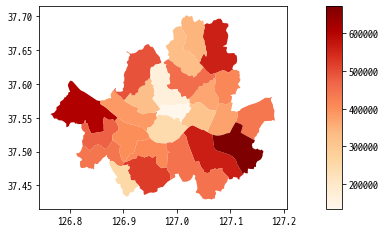

In [4]:
# _02 서울시 시군구 지도 데이터로 단계구분도(Chropleth Map) 시각화하기
fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
seoul_sgg_stat.plot(column='TOTAL_POP', ax=ax, legend=True, cax=cax, cmap='OrRd')

## 행정경계지도위에 스타벅스 매장 위치 그리기

In [5]:
# _03 서울시 스타벅스 매장 데이터 불러오기
_seoul_sb = './output/final/seoul_starbucks.geojson'
seoul_sb_gdf = gpd.read_file(_seoul_sb)
print(seoul_sb_gdf.crs, '\n')
seoul_sb_gdf.info()
seoul_sb_gdf.head()

epsg:4326 

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   STORE_NAME  501 non-null    object  
 1   STORE_TYPE  501 non-null    object  
 2   ADDRESS     501 non-null    object  
 3   SIG_CD      501 non-null    object  
 4   SIG_KOR_NM  501 non-null    object  
 5   geometry    501 non-null    geometry
dtypes: geometry(1), object(5)
memory usage: 23.6+ KB


,STORE_NAME,STORE_TYPE,ADDRESS,SIG_CD,SIG_KOR_NM,geometry
0,역삼아레나빌딩,general,서울특별시 강남구 언주로 425 (역삼동),11680,강남구,POINT (127.04307 37.50109)
1,논현역사거리,general,서울특별시 강남구 강남대로 538 (논현동),11680,강남구,POINT (127.02222 37.51018)
2,국기원사거리,general,서울특별시 강남구 테헤란로 125 (역삼동),11680,강남구,POINT (127.03150 37.49952)
3,대치대원빌딩R,reserve,서울특별시 강남구 남부순환로 2947 (대치동),11680,강남구,POINT (127.06258 37.49467)
4,삼성역섬유센터R,reserve,서울특별시 강남구 테헤란로 518 (대치동),11680,강남구,POINT (127.06065 37.50775)


<AxesSubplot:>

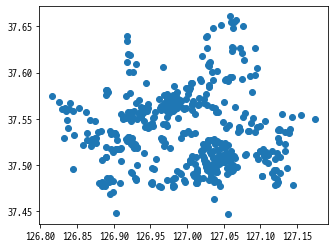

In [6]:
# _04 plot으로 스타벅스 매장 포인트 그리기
seoul_sb_gdf.plot()

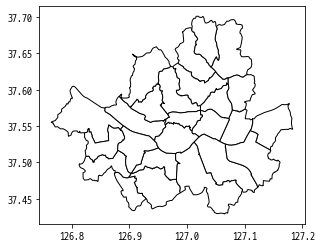

In [7]:
# _05 서울시 시군구 경계 그리기
base_map = seoul_sgg_stat.plot(color='white', edgecolor='black')

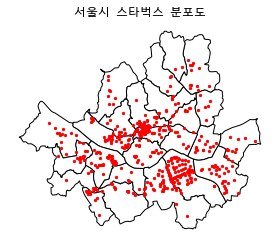

In [8]:
# _06
base_map = seoul_sgg_stat.plot(color='white', edgecolor="k")
ax = seoul_sb_gdf.plot(ax=base_map, marker='o', color='red', markersize=5)
ax.set_axis_off()
ax.set_title("서울시 스타벅스 분포도")
plt.show()

# Folium으로 지도 나타내기

In [9]:
!pip3 install folium
!pip3 install folium --upgrade

  Using cached folium-0.12.1-py2.py3-none-any.whl (94 kB)
  Attempting uninstall: folium
    Found existing installation: folium 0.0.0
    Uninstalling folium-0.0.0:
      Successfully uninstalled folium-0.0.0


In [10]:
import folium

## 기본 지도 나타내기

#### Folium 
- https://github.com/python-visualization/folium

In [12]:
# _01 folium 지도 생성
folium.Map(location=[0,0])

# 위도 경도

In [13]:
# _02 위도, 경도를 입력해 지도의 처음 위치 설정
folium.Map(location=[37.573050, 126.979189])

## 지도 옵션 변경하기

- 지도크기: width, height
- zoom level : 0 ~ 18 (default 10)
- zoom_start / max_zoom / min_zoom / zoom_control
- tiles (default: OpenStreetMap)

In [15]:
# _03 지도 옵션
folium.Map(
    location=[37.573050, 126.979189],
    width=700, height=500,
    min_zoom=9,
    max_zoom=12,
    zoom_start=11,
    zoom_control=False
)

## 타일맵 적용하기

## 지도에 Marker 올리기

In [16]:
# _05 Marker 실습
marker_map = folium.Map(
    location=[37.573050, 126.979189],
    tiles='CartoDB positron',
    width=700, height=500,
    zoom_start=11
)

# coustom_icon = folium.features.CustomIcon('./image/icons/general.png', icon_size=(38, 60))

# 스타벅스 논현역사거리점
folium.Marker(
    location=[37.510221, 127.022268], 
    popup='<h4>강남구</h4>', 
    tooltip='논현역사거리',
    icon=folium.Icon(color='red', icon='info-sign')
#     icon=coustom_icon
).add_to(marker_map)

marker_map

In [18]:
# _06 서울시 스타벅스 매장 지도 시각화
import geopandas as gpd
_seoul_sb = './output/final/seoul_starbucks.geojson'
seoul_sb_gdf = gpd.read_file(_seoul_sb)
seoul_sb_gdf.info()
seoul_sb_gdf.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   STORE_NAME  501 non-null    object  
 1   STORE_TYPE  501 non-null    object  
 2   ADDRESS     501 non-null    object  
 3   SIG_CD      501 non-null    object  
 4   SIG_KOR_NM  501 non-null    object  
 5   geometry    501 non-null    geometry
dtypes: geometry(1), object(5)
memory usage: 23.6+ KB


,STORE_NAME,STORE_TYPE,ADDRESS,SIG_CD,SIG_KOR_NM,geometry
0,역삼아레나빌딩,general,서울특별시 강남구 언주로 425 (역삼동),11680,강남구,POINT (127.04307 37.50109)
1,논현역사거리,general,서울특별시 강남구 강남대로 538 (논현동),11680,강남구,POINT (127.02222 37.51018)
2,국기원사거리,general,서울특별시 강남구 테헤란로 125 (역삼동),11680,강남구,POINT (127.03150 37.49952)
3,대치대원빌딩R,reserve,서울특별시 강남구 남부순환로 2947 (대치동),11680,강남구,POINT (127.06258 37.49467)
4,삼성역섬유센터R,reserve,서울특별시 강남구 테헤란로 518 (대치동),11680,강남구,POINT (127.06065 37.50775)


In [19]:
# _07 GeoDataFrame을 geojson으로 변환하기
gjson = seoul_sb_gdf.to_json()
gjson

'{"type": "FeatureCollection", "features": [{"id": "0", "type": "Feature", "properties": {"ADDRESS": "\\uc11c\\uc6b8\\ud2b9\\ubcc4\\uc2dc \\uac15\\ub0a8\\uad6c \\uc5b8\\uc8fc\\ub85c 425 (\\uc5ed\\uc0bc\\ub3d9)", "SIG_CD": "11680", "SIG_KOR_NM": "\\uac15\\ub0a8\\uad6c", "STORE_NAME": "\\uc5ed\\uc0bc\\uc544\\ub808\\ub098\\ube4c\\ub529", "STORE_TYPE": "general"}, "geometry": {"type": "Point", "coordinates": [127.043069, 37.501087]}}, {"id": "1", "type": "Feature", "properties": {"ADDRESS": "\\uc11c\\uc6b8\\ud2b9\\ubcc4\\uc2dc \\uac15\\ub0a8\\uad6c \\uac15\\ub0a8\\ub300\\ub85c 538 (\\ub17c\\ud604\\ub3d9)", "SIG_CD": "11680", "SIG_KOR_NM": "\\uac15\\ub0a8\\uad6c", "STORE_NAME": "\\ub17c\\ud604\\uc5ed\\uc0ac\\uac70\\ub9ac", "STORE_TYPE": "general"}, "geometry": {"type": "Point", "coordinates": [127.022223, 37.510178]}}, {"id": "2", "type": "Feature", "properties": {"ADDRESS": "\\uc11c\\uc6b8\\ud2b9\\ubcc4\\uc2dc \\uac15\\ub0a8\\uad6c \\ud14c\\ud5e4\\ub780\\ub85c 125 (\\uc5ed\\uc0bc\\ub3d9)",

In [20]:
# _08 Folium지도에 geojson 올려보기
viz_map_1 = folium.Map(
    location=[37.573050, 126.979189],
    tiles='CartoDB positron',
    width=700, height=500,
    zoom_start=11
)

folium.GeoJson(gjson).add_to(viz_map_1)
viz_map_1

In [21]:
# _09 스타벅스 매장 타입별로 서클 마커 그려보기
viz_map_2 = folium.Map(
    location=[37.573050, 126.979189],
    tiles='CartoDB positron',
    zoom_start=11
)

for idx in seoul_sb_gdf.index:
    # 위도/경도 값 가져오기
    point = seoul_sb_gdf.at[idx, 'geometry']
    lat = point.y
    lng = point.x
#     print(point.x)
#     print(point.y)
    # 스타벅스 매장 타입
    store_type = seoul_sb_gdf.at[idx, 'STORE_TYPE']
#     print(store_type)
    
    fillColor = ''
    # 매장 타입별로 색상 변경하기
    if store_type == 'general':
        fillColor = 'green'
    elif store_type == 'reserve':
        fillColor = 'red'
    elif store_type == 'generalDT':
        fillColor = 'orange'

    folium.CircleMarker(
        location=[lat, lng],
        color='grey', 
        fill_color=fillColor, 
        fill_opacity=1,
        weight=0.8,
        radius=3
    ).add_to(viz_map_2)

# folium 지도 실행
viz_map_2

In [23]:
# _10 서울시 시군구 통계 지도 시각화
_seoul_sgg = './output/final/seoul_sgg_stat.geojson'
seoul_sgg_stat = gpd.read_file(_seoul_sgg)
seoul_sgg_stat.info()
seoul_sgg_stat.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   index       25 non-null     int64   
 1   SGG_NM      25 non-null     object  
 2   SGG_CODE    25 non-null     object  
 3   SEDAE       25 non-null     int64   
 4   SEDAE_INGU  25 non-null     float64 
 5   TOTAL_POP   25 non-null     int64   
 6   MALE_POP    25 non-null     int64   
 7   FEMALE_POP  25 non-null     int64   
 8   65_OVER     25 non-null     int64   
 9   COUNT       25 non-null     int64   
 10  geometry    25 non-null     geometry
dtypes: float64(1), geometry(1), int64(7), object(2)
memory usage: 2.3+ KB


,index,SGG_NM,SGG_CODE,SEDAE,SEDAE_INGU,TOTAL_POP,MALE_POP,FEMALE_POP,65_OVER,COUNT,geometry
0,0,강남구,11680,231612,54.29,561052,268941,292111,65060,76,"POLYGON ((127.11880 37.47280, 127.11961 37.471..."
1,1,강동구,11740,177407,45.24,440359,218699,221660,56161,13,"POLYGON ((127.12874 37.52379, 127.11916 37.528..."
2,2,강북구,11305,142533,29.67,328002,160252,167750,56530,5,"POLYGON ((127.02998 37.61234, 127.02722 37.612..."
3,3,강서구,11500,254257,47.24,608255,296175,312080,76032,15,"POLYGON ((126.85669 37.57477, 126.85775 37.574..."
4,4,관악구,11620,255352,42.12,520929,262006,258923,70046,11,"POLYGON ((126.96848 37.44679, 126.96827 37.446..."


In [24]:
# _11 geojson만들기
sgg_geojson = seoul_sgg_stat.to_json()
sgg_geojson

'{"type": "FeatureCollection", "features": [{"id": "0", "type": "Feature", "properties": {"65_OVER": 65060, "COUNT": 76, "FEMALE_POP": 292111, "MALE_POP": 268941, "SEDAE": 231612, "SEDAE_INGU": 54.29, "SGG_CODE": "11680", "SGG_NM": "\\uac15\\ub0a8\\uad6c", "TOTAL_POP": 561052, "index": 0}, "geometry": {"type": "Polygon", "coordinates": [[[127.11879950868126, 37.47279633333915], [127.11960528856493, 37.471682364265305], [127.12053781740288, 37.470378382065086], [127.121514010366, 37.46881876933387], [127.12218211950136, 37.46751730536408], [127.12229786176484, 37.466764412357264], [127.12242369520052, 37.465859562920144], [127.1224034651138, 37.46559641185152], [127.1223630223878, 37.46545116706537], [127.12229337185815, 37.46521354246407], [127.12184707701044, 37.46502865992422], [127.11746048978142, 37.462171656657524], [127.11718027748311, 37.46182259616152], [127.1170799523129, 37.461539467143886], [127.11699304383481, 37.46125976164172], [127.11695260084458, 37.46101288125213], [12

In [25]:
# _12 행정경계 지도 그리기
def style_function(feature):
    return {
        'opacity': 0.7,
        'weight': 1,
        'fillOpacity':0.1,
        'color': 'black',
        'fillColor': 'yellow',
    }

viz_map_3 = folium.Map(
    location=[37.573050, 126.979189],
    tiles='CartoDB positron',
    zoom_start=11
)

folium.GeoJson(
    sgg_geojson,
    style_function=style_function,
).add_to(viz_map_3)

for idx in seoul_sb_gdf.index:
    # 위도/경도 값 가져오기
    point = seoul_sb_gdf.at[idx, 'geometry']
    lat = point.y
    lng = point.x
    # 스타벅스 매장 타입
    store_type = seoul_sb_gdf.at[idx, 'STORE_TYPE']
    
    fillColor = ''
    # 매장 타입별로 색상 변경하기
    if store_type == 'general':
        fillColor = 'green'
    elif store_type == 'reserve':
        fillColor = 'red'
    elif store_type == 'generalDT':
        fillColor = 'orange'

    folium.CircleMarker(
        location=[lat, lng],
        color='grey', 
        fill_color=fillColor, 
        fill_opacity=1,
        weight=0.8,
        radius=3
    ).add_to(viz_map_3)
    
viz_map_3

In [26]:
# _13 시군구별 중심점 그려보기
seoul_sgg_stat['centoroid'] = seoul_sgg_stat.centroid
seoul_sgg_stat.head()

C:\Users\user\AppData\Local\Temp/ipykernel_6704/2929838824.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  seoul_sgg_stat['centoroid'] = seoul_sgg_stat.centroid


,index,SGG_NM,SGG_CODE,SEDAE,SEDAE_INGU,TOTAL_POP,MALE_POP,FEMALE_POP,65_OVER,COUNT,geometry,centoroid
0,0,강남구,11680,231612,54.29,561052,268941,292111,65060,76,"POLYGON ((127.11880 37.47280, 127.11961 37.471...",POINT (127.06270 37.49719)
1,1,강동구,11740,177407,45.24,440359,218699,221660,56161,13,"POLYGON ((127.12874 37.52379, 127.11916 37.528...",POINT (127.14682 37.55117)
2,2,강북구,11305,142533,29.67,328002,160252,167750,56530,5,"POLYGON ((127.02998 37.61234, 127.02722 37.612...",POINT (127.01110 37.64358)
3,3,강서구,11500,254257,47.24,608255,296175,312080,76032,15,"POLYGON ((126.85669 37.57477, 126.85775 37.574...",POINT (126.82433 37.56114)
4,4,관악구,11620,255352,42.12,520929,262006,258923,70046,11,"POLYGON ((126.96848 37.44679, 126.96827 37.446...",POINT (126.94601 37.46716)


In [27]:
# _14 통계지도 만들기 (단계구분도 + 버블지도)
choropleth_map = folium.Map(
    location=[37.573050, 126.979189],
    tiles='CartoDB dark_matter',
    min_zoom=10,
    max_zoom=12,
    zoom_start=11
)

folium.Choropleth(
    geo_data=sgg_geojson,
    name='choropleth',
    data=seoul_sgg_stat,
    columns=['SGG_CODE', 'TOTAL_POP'],
    key_on='feature.properties.SGG_CODE',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
).add_to(choropleth_map)

mean = seoul_sgg_stat.COUNT.mean()
for idx in seoul_sgg_stat.index:
    point = seoul_sgg_stat.at[idx, 'centoroid']
    lat = point.y
    lng = point.x
    count = seoul_sgg_stat.at[idx, 'COUNT']
    name = seoul_sgg_stat.at[idx, 'SGG_NM']
    
    if count == 0:
        continue
    elif count > mean:
        fillColor = '#FF0000'
    else:
        fillColor = '#CCFF33'
    
    folium.CircleMarker(
        location=[lat, lng], 
        tooltip=name,
        color='#FFFF00', 
        fill_color=fillColor, 
        fill_opacity=0.7,
        weight=1.5,
        radius=count/2
    ).add_to(choropleth_map)

choropleth_map